In [74]:
import cv2
import numpy as np
import os
from matplotlib.pyplot import imshow
%matplotlib inline
working_directory = "/home/ns/semestr6/iwm/Vessels-Recognition/"

In [75]:
file = 'images/01_dr.JPG'
full_path = os.path.join(working_directory, file)
image = cv2.imread(full_path, 1)
orginal_imnage = cv2.imread(full_path, 1)
b, g, r = cv2.split(image)

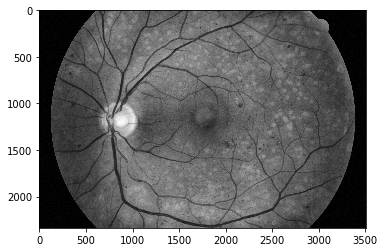

In [76]:
# CLAHE - contrast limited adaptive histogram equalization - poprawia kontrast
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_g = clahe.apply(g)
imshow(clahe_g, cmap="gray")

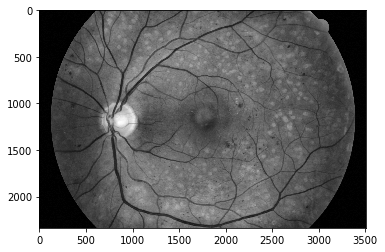

In [77]:
# applying morphologies
structuring_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
m1 = cv2.morphologyEx(clahe_g, cv2.MORPH_OPEN,
                          structuring_element, iterations=1)
c1 = cv2.morphologyEx(m1, cv2.MORPH_CLOSE, structuring_element, iterations=1)
imshow(c1, cmap="gray")

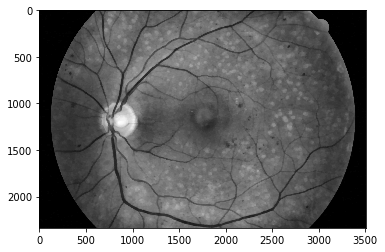

In [78]:
structuring_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
m2 = cv2.morphologyEx(c1, cv2.MORPH_OPEN,
                          structuring_element, iterations=1)
c2 = cv2.morphologyEx(m2, cv2.MORPH_CLOSE, structuring_element, iterations=1)
imshow(c2, cmap="gray")

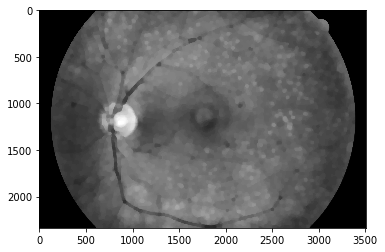

In [80]:
structuring_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (30, 30))
m3 = cv2.morphologyEx(c2, cv2.MORPH_OPEN,
                          structuring_element, iterations=1)
c3 = cv2.morphologyEx(m3, cv2.MORPH_CLOSE, structuring_element, iterations=1)
imshow(c3, cmap="gray")

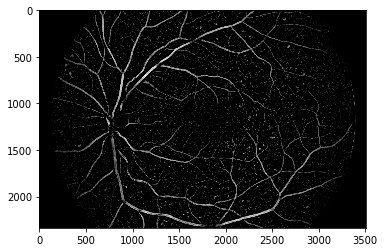

In [81]:
# subtracting clahe_g from c3
subtr = cv2.subtract(c3, clahe_g)
clahe_subtr = clahe.apply(subtr)
imshow(clahe_subtr, cmap="gray")

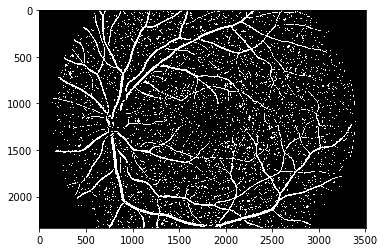

In [82]:
# thresholding
ret, thresh = cv2.threshold(clahe_subtr,15,255,cv2.THRESH_BINARY)
imshow(thresh, cmap="gray")

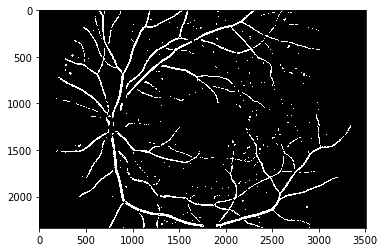

In [83]:
structuring_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
o1 = cv2.morphologyEx(thresh, cv2.MORPH_OPEN,
                          structuring_element, iterations=2)
imshow(o1, cmap="gray")

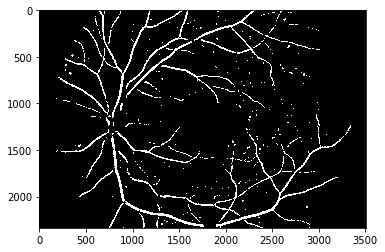

In [84]:
structuring_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
c1 = cv2.morphologyEx(o1, cv2.MORPH_CLOSE,
                          structuring_element, iterations=1)
imshow(c1, cmap="gray")

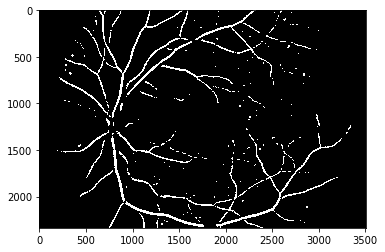

In [85]:
structuring_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
o2 = cv2.morphologyEx(c1, cv2.MORPH_OPEN,
                          structuring_element, iterations=1)
imshow(o2, cmap="gray")

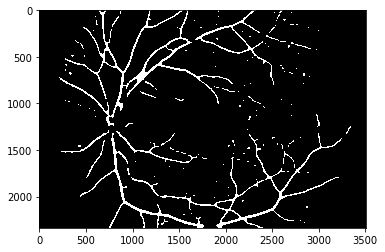

In [96]:
structuring_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))
c2 = cv2.morphologyEx(o2, cv2.MORPH_CLOSE,
                          structuring_element, iterations=2)
imshow(c2, cmap="gray")

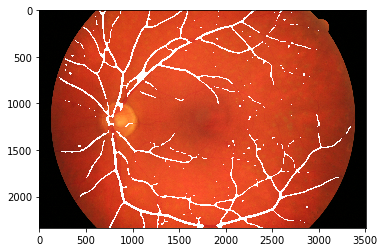

In [97]:
a = cv2.split(orginal_imnage)
for i, x in enumerate(a):
    x = cv2.add(x, c2)
    a[i] = x
result = cv2.merge(a)[...,::-1]
imshow(result)